In [ ]:
!pip install nilearn

In [28]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.calibration import calibration_curve, CalibrationDisplay

# **Dataset A**

In [4]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # this needs to be modified for  some tasks
print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_fdata().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females  and 0 for males

100 regions found in this atlas


### **Question 1**

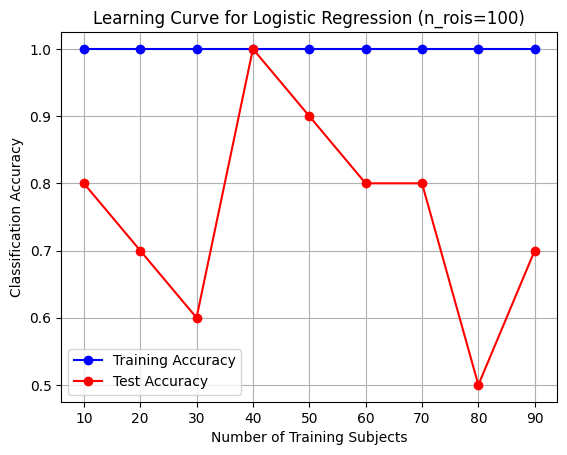

In [14]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set n_rois=100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

X_test, y_test = input_variables[-10:], output_variable[-10:] # Set test data
train_accuracies, test_accuracies = [], [] # Lists to store accuracies
training_sizes = list(range(10, 100, 10)) # Training sizes

for n_train in training_sizes: # Iterate over training sizes
    X_train, y_train = input_variables[:n_train], output_variable[:n_train] # Set training data

    log_model_q1 = LogisticRegression(penalty='l2', C=1) # Create log model
    log_model_q1.fit(X_train, y_train) # Fit log model

    train_acc = accuracy_score(y_train, log_model_q1.predict(X_train)) # Train accuracy
    test_acc = accuracy_score(y_test, log_model_q1.predict(X_test)) # Test accuracy

    train_accuracies.append(train_acc) # Append train accuracy
    test_accuracies.append(test_acc) # Append test accuracy

# Plotting the learning curve
plt.plot(training_sizes, train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(training_sizes, test_accuracies, label="Test Accuracy", marker='o', color='red')
plt.xlabel("Number of Training Subjects")
plt.ylabel("Classification Accuracy")
plt.title("Learning Curve for Logistic Regression (n_rois=100)")
plt.legend()
plt.grid(True)
plt.show()

### **Question 2**

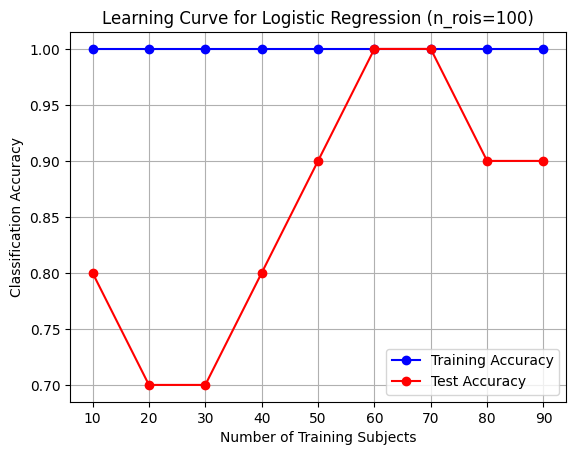

In [15]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000) # Set n_rois to 1000
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

X_test, y_test = input_variables[-10:], output_variable[-10:] # Set test data
train_accuracies, test_accuracies = [], [] # Lists to store accuracies
training_sizes = list(range(10, 100, 10)) # Training sizes

for n_train in training_sizes: # Iterate over training sizes
    X_train, y_train = input_variables[:n_train], output_variable[:n_train] # Set training data

    log_model_q2 = LogisticRegression(penalty='l2', C=1) # Create log model
    log_model_q2.fit(X_train, y_train) # Fit log model

    train_acc = accuracy_score(y_train, log_model_q2.predict(X_train)) # Train accuracy
    test_acc = accuracy_score(y_test, log_model_q2.predict(X_test)) # Test accuracy

    train_accuracies.append(train_acc) # Append train accuracy
    test_accuracies.append(test_acc) # Append test accuracy

# Plotting the learning curve
plt.plot(training_sizes, train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(training_sizes, test_accuracies, label="Test Accuracy", marker='o', color='red')
plt.xlabel("Number of Training Subjects")
plt.ylabel("Classification Accuracy")
plt.title("Learning Curve for Logistic Regression (n_rois=100)")
plt.legend()
plt.grid(True)
plt.show()

### **Question 3**

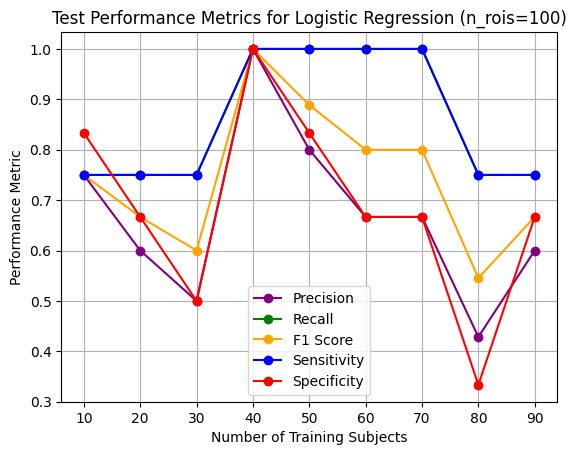

In [20]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

X_test, y_test = input_variables[-10:], output_variable[-10:] # Set test data
precision_scores, recall_scores, f1_scores = [], [], [] # Lists for precision, recall, F1
sensitivity_scores, specificity_scores = [], [] # Lists for sensitivity, specificity
training_sizes = list(range(10, 100, 10)) # Training sizes

for n_train in training_sizes: # Iterate over training sizes
    X_train, y_train = input_variables[:n_train], output_variable[:n_train] # Set training data

    log_model_q3 = LogisticRegression(penalty='l2', C=1) # Create log model
    log_model_q3.fit(X_train, y_train) # Fit log model

    test_preds = log_model_q3.predict(X_test) # Predict on test data

    precision = precision_score(y_test, test_preds) # Calculate precision
    recall = recall_score(y_test, test_preds) # Calculate recall
    f1 = f1_score(y_test, test_preds) # Calculate F1 score
    tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel() # Get confusion matrix
    sensitivity = tp / (tp + fn) # Calculate sensitivity
    specificity = tn / (tn + fp) # Calculate specificity

    # Append results
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)

# Plotting the performance metrics
plt.plot(training_sizes, precision_scores, label="Precision", marker='o', color='purple')
plt.plot(training_sizes, recall_scores, label="Recall", marker='o', color='green')
plt.plot(training_sizes, f1_scores, label="F1 Score", marker='o', color='orange')
plt.plot(training_sizes, sensitivity_scores, label="Sensitivity", marker='o', color='blue')
plt.plot(training_sizes, specificity_scores, label="Specificity", marker='o', color='red')
plt.xlabel("Number of Training Subjects")
plt.ylabel("Performance Metric")
plt.title("Test Performance Metrics for Logistic Regression (n_rois=100)")
plt.legend()
plt.grid(True)
plt.show()

### **Question 4**

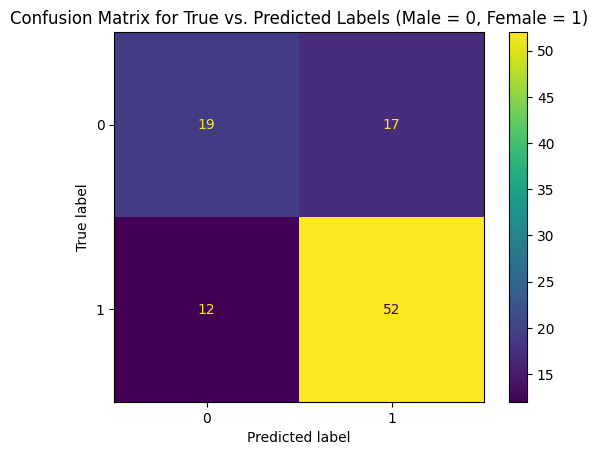

In [12]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

kf = KFold(n_splits=10, shuffle=True, random_state=42) # 10-fold CV
true_labels, pred_labels = [], [] # Lists for true and predicted labels

for train_index, test_index in kf.split(input_variables): # Iterate over folds
    X_train, y_train = input_variables[train_index], output_variable[train_index] # Set train data
    X_test, y_test = input_variables[test_index], output_variable[test_index] # Set test data

    log_model_q4 = LogisticRegression(penalty='l2', C=1) # Create log model
    log_model_q4.fit(X_train, y_train) # Fit log model

    test_preds = log_model_q4.predict(X_test) # Predict on test data

    true_labels.extend(y_test) # Add true labels to list
    pred_labels.extend(test_preds) # Add predicted labels to list

ConfusionMatrixDisplay(confusion_matrix(true_labels, pred_labels)).plot() # Display confusion matrix
plt.title('Confusion Matrix for True vs. Predicted Labels (Male = 0, Female = 1)') # Set title
plt.show()

### **Question 5**

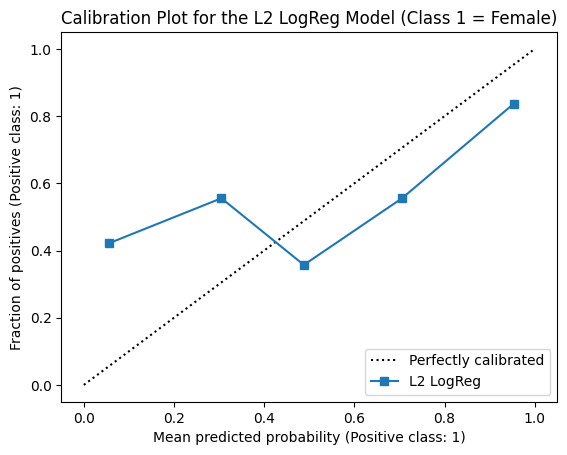

In [71]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

kf = KFold(n_splits=10)#, shuffle=True, random_state=42) # 10-fold CV
true_labels, pred_probs = [], [] # Lists for true labels and predicted probabilities

for train_index, test_index in kf.split(input_variables): # Iterate over folds
    X_train, X_test = input_variables[train_index], input_variables[test_index] # Set train data
    y_train, y_test = output_variable[train_index], output_variable[test_index] # Set test data

    log_model_q5 = LogisticRegression(penalty='l2', C=1) # Create log model
    log_model_q5.fit(X_train, y_train) # Fit log model

    test_probs = log_model_q5.predict_proba(X_test)[:,1] # Probability of class 1 (female)

    true_labels.extend(y_test) # Add true labels to list
    pred_probs.extend(test_probs) # Add predicted probabilities to list

CalibrationDisplay.from_predictions(y_true=true_labels, y_prob=pred_probs, name = "L2 LogReg") # Display calibration plot
plt.title("Calibration Plot for the L2 LogReg Model (Class 1 = Female)") # Set title
plt.show()

# **Dataset B**

In [56]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_fdata().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] #  gives subject age on standard units after z-scoring

788 regions found in this atlas


### **Question 6**

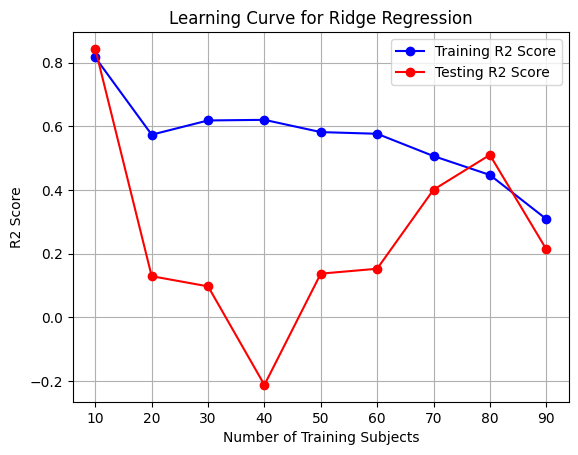

In [25]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 0) # First atlas resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0]

X_test, y_test = input_variables[-10:], output_variable[-10:] # Set test data
train_r2_scores, test_r2_scores = [], [] # Lists to store R2 scores
training_sizes = list(range(10, 100, 10)) # Training sizes

for n_train in training_sizes: # Iterate over training sizes
    X_train, y_train = input_variables[:n_train], output_variable[:n_train] # Set training data

    ridge_q6 = Ridge() # Create Ridge model
    ridge_q6.fit(X_train, y_train) # Fit log model

    train_r2 = r2_score(y_train, ridge_q6.predict(X_train)) # Train accuracy
    test_r2 = r2_score(y_test, ridge_q6.predict(X_test)) # Test accuracy

    train_r2_scores.append(train_r2) # Append train R2 score
    test_r2_scores.append(test_r2) # Append test R2 score

# Plotting the learning curve
plt.plot(training_sizes, train_r2_scores, label="Training R2 Score", marker='o', color='blue')
plt.plot(training_sizes, test_r2_scores, label="Testing R2 Score", marker='o', color='red')
plt.xlabel("Number of Training Subjects")
plt.ylabel("R2 Score")
plt.title("Learning Curve for Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

### **Question 7**

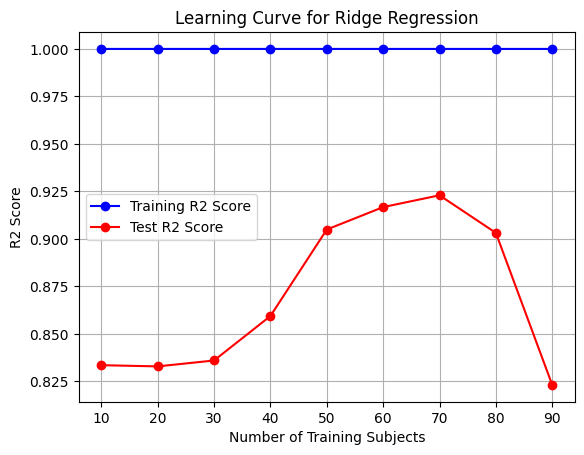

In [27]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42) # Last atlas resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0]

X_test, y_test = input_variables[-10:], output_variable[-10:] # Set test data
train_r2_scores, test_r2_scores = [], [] # Lists to store R2 scores
training_sizes = list(range(10, 100, 10)) # Training sizes

for n_train in training_sizes: # Iterate over training sizes
    X_train, y_train = input_variables[:n_train], output_variable[:n_train] # Set training data

    ridge_q7 = Ridge() # Create Ridge model
    ridge_q7.fit(X_train, y_train) # Fit log model

    train_r2 = r2_score(y_train, ridge_q7.predict(X_train)) # Train R2
    test_r2 = r2_score(y_test, ridge_q7.predict(X_test)) # Test R2

    train_r2_scores.append(train_r2) # Append train R2 score
    test_r2_scores.append(test_r2) # Append test R2 score

# Plotting the learning curve
plt.plot(training_sizes, train_r2_scores, label="Training R2 Score", marker='o', color='blue')
plt.plot(training_sizes, test_r2_scores, label="Test R2 Score", marker='o', color='red')
plt.xlabel("Number of Training Subjects")
plt.ylabel("R2 Score")
plt.title("Learning Curve for Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

### **Question 8**

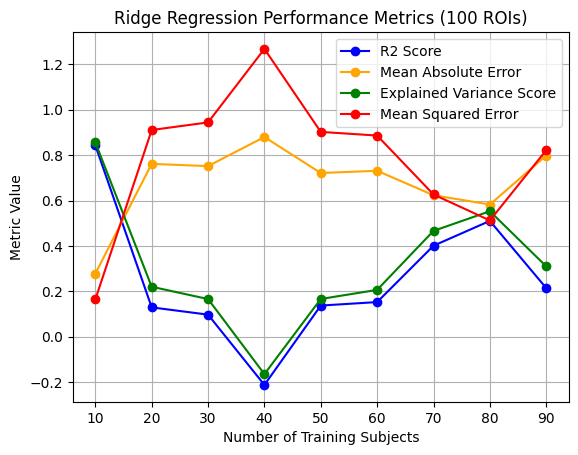

In [72]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 0)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0]

r2_scores, mae_scores, explained_var_scores, mse_scores = [], [], [], [] # Lists for scores
training_sizes = list(range(10, 100, 10)) # Training sizes

for n_train in training_sizes: # Iterate over training sizes
    X_train, X_test = input_variables[:n_train], input_variables[90:] 
    y_train, y_test = output_variable[:n_train], output_variable[90:]

    ridge_q8 = Ridge() # Create Ridge model
    ridge_q8.fit(X_train, y_train) # Fit Ridge model
    test_preds = ridge_q8.predict(X_test) # Predict on the test set

    # Calculate metrics
    r2_scores.append(r2_score(y_test, test_preds))
    mae_scores.append(mean_absolute_error(y_test, test_preds))
    explained_var_scores.append(explained_variance_score(y_test, test_preds))
    mse_scores.append(mean_squared_error(y_test, test_preds))

plt.plot(training_sizes, r2_scores, marker='o', color='blue', label="R2 Score")
plt.plot(training_sizes, mae_scores, marker='o', color='orange', label="Mean Absolute Error")
plt.plot(training_sizes, explained_var_scores, marker='o', color='green', label="Explained Variance Score")
plt.plot(training_sizes, mse_scores, marker='o', color='red', label="Mean Squared Error")
plt.xlabel("Number of Training Subjects")
plt.ylabel("Metric Value")
plt.title("Ridge Regression Performance Metrics (100 ROIs)")
plt.legend()
plt.grid(True)
plt.show()

### **Question 9**

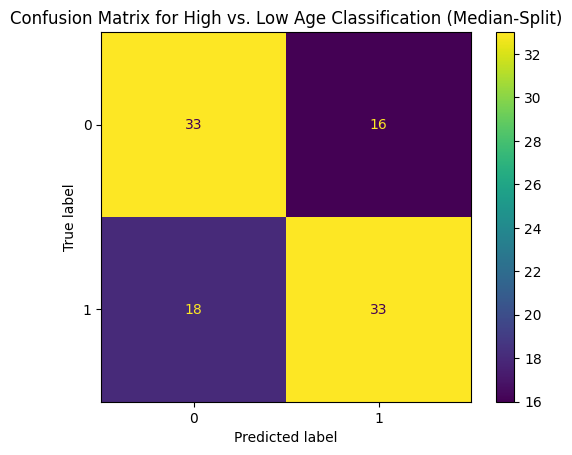

In [68]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 0)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0]

age_median = np.median(output_variable) # Median age
kf = KFold(n_splits=10, shuffle=True, random_state=42) # 10-fold CV
true_labels, pred_labels = [], [] # Lists for true and predicted labels

for train_index, test_index in kf.split(input_variables): # Iterate over folds
    X_train, y_train = input_variables[train_index], output_variable[train_index] # Set train data
    X_test, y_test = input_variables[test_index], output_variable[test_index] # Set test data

    ridge_q9 = Ridge() # Create Ridge model
    ridge_q9.fit(X_train, y_train) # Fit Ridge model
    test_preds = ridge_q9.predict(X_test) # Predict on test data
    test_pred_labels = (test_preds >= age_median).astype(int) # Get predicted labels

    true_labels.extend((y_test >= age_median).astype(int)) # Save true labels
    pred_labels.extend(test_pred_labels) # Save predicted labels

ConfusionMatrixDisplay(confusion_matrix(true_labels, pred_labels)).plot() # Display confusion matrix
plt.title("Confusion Matrix for High vs. Low Age Classification (Median-Split)") # Add title
plt.show()

### **Question 10**

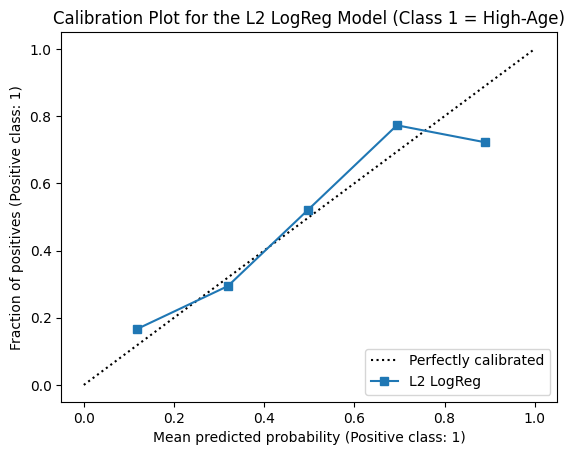

In [77]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 0)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0]

age_median = np.median(output_variable) # Median age
output_labels = (output_variable >= age_median).astype(int)  # 1 for high, 0 for low
kf = KFold(n_splits=10)#, shuffle=True, random_state=42) # 10-fold CV
probabilities, true_labels = [], [] # Lists for probabilities and true labels

for train_index, test_index in kf.split(input_variables): # Iterate over folds
    X_train, X_test = input_variables[train_index], input_variables[test_index] # Set train data
    y_train, y_test = output_labels[train_index], output_labels[test_index] # Set test data

    log_model_q10 = LogisticRegression(penalty='l2', C=1.0) # Create log model
    log_model_q10.fit(X_train, y_train) # Fit log model
    
    test_probs = log_model_q10.predict_proba(X_test)[:,1] # Calculate probability of class 1 (high)
    probabilities.extend(test_probs) # Add probabilities to list
    true_labels.extend(y_test) # Add true labels to list

CalibrationDisplay.from_predictions(y_true=true_labels, y_prob=probabilities, name = "L2 LogReg") # Display calibration plot
plt.title("Calibration Plot for the L2 LogReg Model (Class 1 = High-Age)") # Add title
plt.show()